In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("athlete_events.csv")
regions_df=pd.read_csv("noc_regions.csv")

In [6]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
regions_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [8]:
df.shape

(271116, 15)

In [9]:
df=df[df['Season'] == 'Summer']

In [10]:
df.shape

(222552, 15)

In [11]:
df=df.merge(regions_df, on="NOC",how="left")

In [12]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [13]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [14]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(1385)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [19]:
df=pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [21]:
medal_tally=df.drop_duplicates(subset=['Team', 'NOC','Games','City','Sport',"Event","Medal"])

In [22]:
medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [23]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

/var/folders/1p/pgl_b0n91554dqpd82v8fx900000gn/T/ipykernel_1392/1867159206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']


In [24]:
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False,True
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,...,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,False,False,True,True
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,...,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,True,False,False,True
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,False,False,False,False
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,False,False,False,False


In [25]:
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False,True
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,...,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,False,False,True,True
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,...,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,True,False,False,True
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,False,False,False,False
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,...,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,False,False,False,False


In [26]:
years = df['Year'].unique().tolist()

In [27]:
years.sort()

In [28]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
years.insert(0,'Overall')

In [30]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [31]:
country = np.unique(df['region'].dropna().values).tolist()

In [32]:
country.sort()

In [33]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [34]:
def fetch_medal_tally(df, year, country):
    medal_df=df.drop_duplicates(subset=['Team', 'NOC','Games','City','Sport',"Event","Medal"])
    flag=0
    if year == 'Overall' and country == 'Overall':
        temp_df=medal_df 

    if year == 'Overall' and country != "Overall":
        flag=1
        temp_df=medal_df[medal_df['region'] == country] 

    if year != 'Overall' and country == "Overall":
        temp_df=medal_df[medal_df['Year'] == int(year)] 

    if year != 'Overall' and country != 'Overall':
        temp_df=medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)] 


    if flag == 1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values("Year").reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values("Gold",ascending=False).reset_index()

    x['total'] = x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [35]:
fetch_medal_tally(df, year="2012", country="Japan")

  region  Gold  Silver  Bronze  total
0  Japan     7      14      17     38


In [36]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC','Games','City','Sport',"Event","Medal"])

In [37]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,False,False,True
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,True,False,False
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,False,False,False
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,False,False,False


In [38]:
medal_df[medal_df['region'] == 'India']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
436,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,False,False,False
437,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,False,False,False
790,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,False,False,False
791,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,False,False,False
792,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,False,False,False
216985,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,India,NaN,False,False,False
218411,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN,False,False,False
222416,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN,False,False,False


Overall Analysis--
No. of editions 
no. of entrypoints 
no. of athletes 
no. of participating nations

In [39]:
df['Year'].unique().shape[0]-1

28

In [40]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [41]:
df['Event'].unique().shape

(651,)

In [42]:
## Participating Nations Over The Years
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [ ]:
# Count unique participating regions per Year, sorted chronologically 
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_index().reset_index(name='count')

In [ ]:
nations_over_time.rename(columns={'index':'Edition','count':'No of Countries'}, inplace=True)

In [58]:
import plotly.express as px

In [ ]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['No of Countries', 'count'] but received: Edition

In [62]:
x=df.drop_duplicates(['Year', 'Sport', 'Event'])

In [68]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Year', ylabel='Sport'>

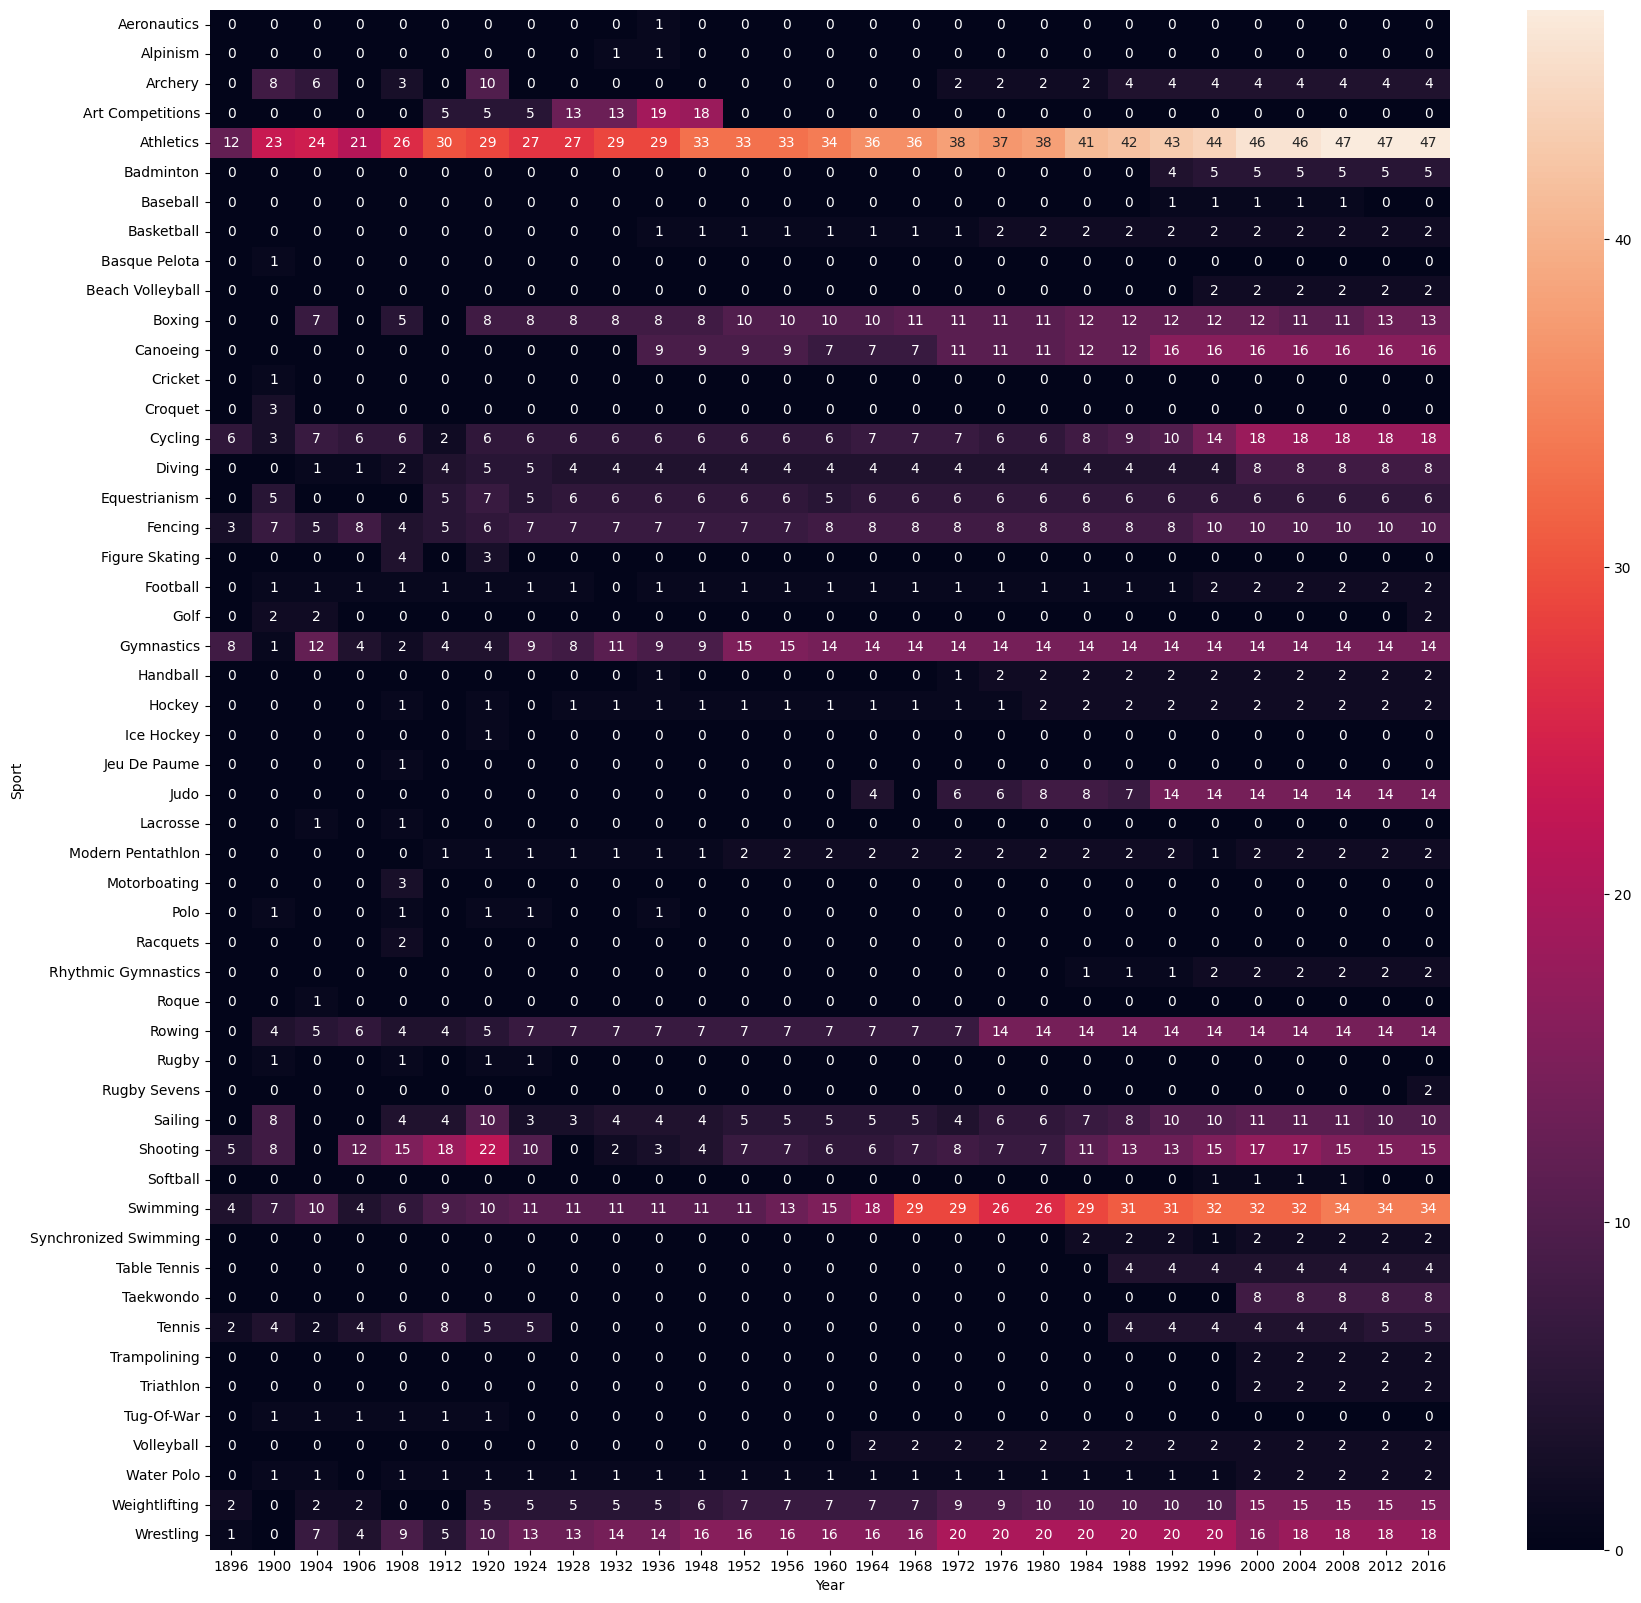

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)